# Matplotlib

Today, we make pictures...not pretty pictures, but pictures nonetheless. Matplotlib in 3...2...1  [PDSH Ch 4](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html)

Matplotlib is the most popular package for plotting data in Python and many "nicer" plotting packages are either built on top of Matplotlib or borrow heavily from Matplotlib syntax. So Matplotlib is a great place to start for understanding figure-making in Python (and it's a very capable tool that will satisfy most of our needs most of the time).

Before we dive into code, a little bit about the organization of a figure.

## Figures, Axes, and Plots

Figures contain axes contain plots. Let's work from the inside out. 

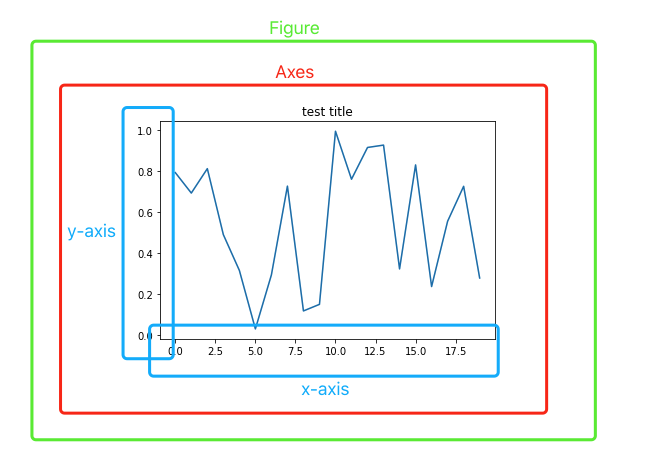
Image credit: [Towards Data Science](https://towardsdatascience.com/what-are-the-plt-and-ax-in-matplotlib-exactly-d2cf4bf164a9)

### Plots

The plot is the visual representation of the data, whether that be a line graph, a pie chart, a scatter plot, a histogram, a bar graph, a Sankey diagram, a heatmap, a violin plot, a correlation matrix, a box and whisker plot, a chord diagram, whatever.

The plot is an object that has properties such as:

 - the values of the data
 - the type of plot
 - the color of lines, markers, or filled areas
 - the thickness or style of lines
 - opacity of plotted objects

### Axes

Axes (plural of axis not axe) contain plots. Most commonly, we encounter plots in traditional rectangular axes with x- and y-axis extending horizontally and vertically, but axes can be 3D as well. Also, axes can be invisible/hidden, but they're still there.

Axes properties define the look of the container for your plots:

 - the extent of the x- and y-axes (and z?)
 - the axes labels and title
 - the background color and grid
 - any shape or text annotation
 - legends
 - the plots it contains

### Figures

Figures contain one or more axes. The figure is the rectangular panel that contains your axes.

Figure properties include:

 - title
 - size/shape
 - background color
 - the axes it contains


Okay, let's see this in practice.

## Example: Line graphs

For the line graph demo, we'll plot the Taylor series expansion of the sine wave.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

First, let's create some simple data using numpy.

In [13]:
x = np.arange(-7,7,0.1)

y = np.sin(x)

'''Taylor Series approximations of Sine of increasing order.'''
y1 = x
y2 = y1 - (x**3)/6
y3 = y2 + (x**5)/120
y4 = y3 - (x**7)/5040


In [14]:
display(x.shape)
display(y.shape)

(140,)

(140,)

Create the figure and axes with subplots. 
This is not the most basic approach, but it's very flexible. Learn it now and never go back.

 - ```plt.subplots()``` creates a grid of axes. For a single set of axes, we'll make the subplot grid 1x1.
 - ```ax.plot()``` plots the data.
 - ```plt.show()``` displays the figure.

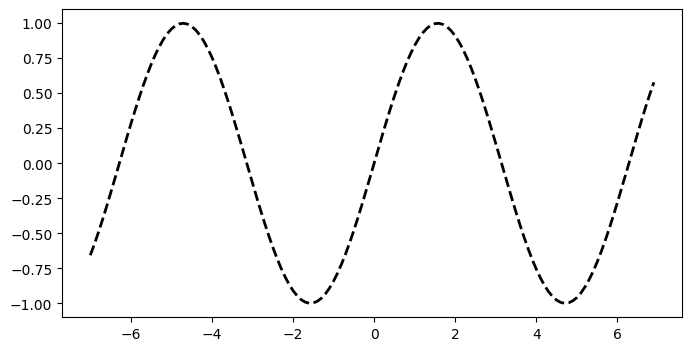

In [15]:
fig, ax = plt.subplots(1,1, figsize = (8,4))
''' Now we plot on the axes '''
ax.plot(x, y, color = 'k', linestyle = '--', linewidth=2)

plt.show()

Let's add the other traces to this plot.

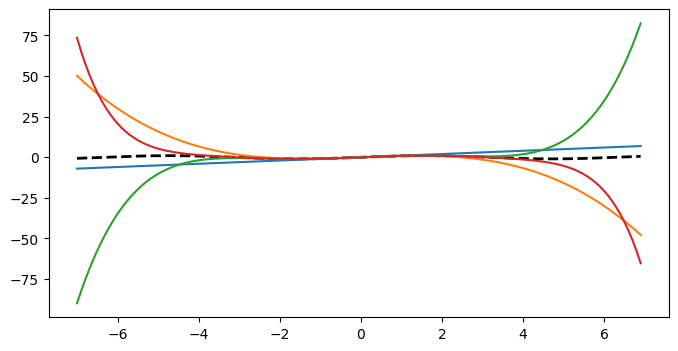

In [16]:
fig, ax = plt.subplots(1,1, figsize = (8,4))
''' Now we plot on the axes '''
ax.plot(x, y, color = 'k', linestyle = '--', linewidth=2)
ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y3)
ax.plot(x, y4)

plt.show()

*Nearly every* aspect of a figure, axes, or plot can be changed to fit your needs or wants. We achieve this by specifying properties of these objects.

In the next code block:
 - change the limits of the axes so we can see what's going on where it matters
 - let's give each trace a descriptive label and add a legend
 - add x- and y- axes labels
 - add a title to the axes

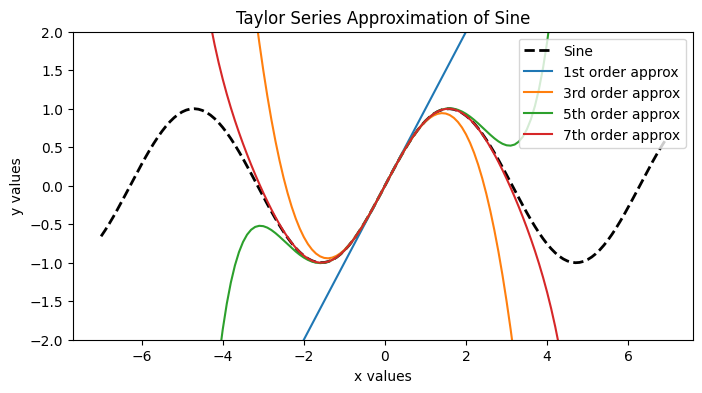

In [17]:
fig, ax = plt.subplots(1,1, figsize = (8,4))
''' Now we plot on the axes '''
ax.plot(x, y, 
        color = 'k', linestyle = '--', linewidth=2,
        label = 'Sine')
ax.plot(x, y1,
        label = '1st order approx')
ax.plot(x, y2,
        label = '3rd order approx')
ax.plot(x, y3,
        label = '5th order approx')
ax.plot(x, y4,
        label = '7th order approx')

ax.legend()
ax.set_ylim([-2,2])

ax.set_title('Taylor Series Approximation of Sine')
ax.set_xlabel('x values')
ax.set_ylabel('y values')

plt.show()

## Example: histogram

Another graph we'll use frequently is the histogram. Let's generate some random data (drawn from the normal distribution) and see how the histogram approximates the normal curve as the number of samples increases.

In [18]:
''' Create some sample data drawn from different normal distributions with different means and different sample size '''
a = 5*np.random.randn(200)
b = 5*np.random.randn(1000) + 10
c = 5*np.random.randn(5000) + 20

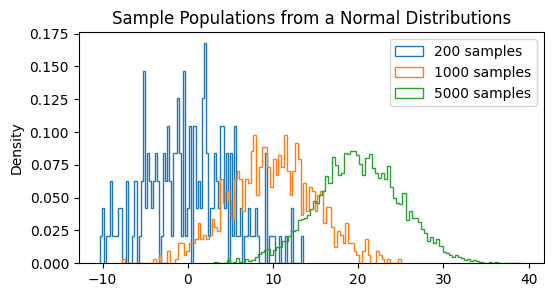

In [19]:
fig,ax = plt.subplots(1,1, figsize = (6, 3))

plot_opts = dict(bins = 100,
                 density = True, 
                 alpha = 1,
                 histtype = 'step')

ax.hist(a, **plot_opts, label = '200 samples')
ax.hist(b, **plot_opts, label = '1000 samples')
ax.hist(c, **plot_opts, label = '5000 samples')

ax.set_ylabel('Density')
ax.set_title('Sample Populations from a Normal Distributions')
ax.legend()

plt.show()

## Example: Scatter plot

In this example, we'll explore one of the data sets posted in the Data-In-The-Wild Forum (contributed by Charlie Boye).

The data in this analysis come from the United States Geological Survey (USGS) and the specific search parameters are included in this [link](https://earthquake.usgs.gov/earthquakes/map/?extent=28.82543,-128.93555&extent=40.02761,-104.32617&range=search&timeZone=utc&search=%7B%22name%22:%22Search%20Results%22,%22params%22:%7B%22starttime%22:%221932-01-01%2000:00:01%22,%22endtime%22:%222024-09-08%2023:59:59%22,%22maxlatitude%22:35.996,%22minlatitude%22:32.556,%22maxlongitude%22:-114.434,%22minlongitude%22:-121.652,%22minmagnitude%22:4.5,%22orderby%22:%22time%22%7D%7D). I've provided a file CAearthquakes.csv that include the data from this search.

First, let's ask, what data do we need from this set?

Now, how do we load the data? We'll use Numpy's ```loadtxt``` function ([loadtxt docs](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)).

In [20]:
ca_earthquakes_git = 'https://raw.githubusercontent.com/GettysburgDataScience/datasets/refs/heads/main/CAearthquakes.csv'

eq_dates = np.loadtxt(ca_earthquakes_git, dtype = str, skiprows = 1, delimiter = ',', usecols = [0])
eq_data = np.loadtxt(ca_earthquakes_git, skiprows = 1, delimiter = ',', usecols = [1,2,4])

eq_headers = np.loadtxt(ca_earthquakes_git, dtype=str, max_rows=1, delimiter = ',', usecols = [1,2,4])

print(eq_headers)

['latitude' 'longitude' 'mag']


Let's make a dict to store our data.

In [21]:

eq = {} # empty dict

for k, header in enumerate(eq_headers):
    eq[header] = eq_data[:,k]

eq['date'] = eq_dates

Let's recreate something like the map view from the USGS website.

Lat vs long as scatter plot

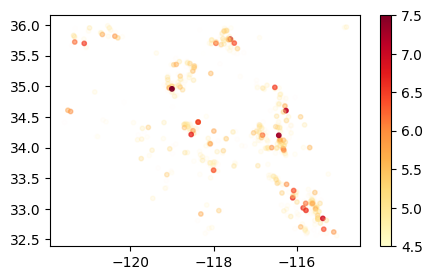

In [22]:
# Student requested making the opacity of the markers indicate magnitude.
# alpha (opacity) takes a value from 0-1 (transparent - opaque).
# To scale an array so the values are in the 0-1 range, subtract off the minimum and divide by (max - min)
mag_01 = (eq['mag'] - eq['mag'].min())/(eq['mag'].max()-eq['mag'].min())

fig, ax = plt.subplots(1,1, figsize = (5,3))
sc = ax.scatter(eq['longitude'], eq['latitude'],
                s = 10, 
                c = eq['mag'], alpha = mag_01, cmap = 'YlOrRd'
                )

fig.colorbar(sc)
plt.show()